## Introduction

Welcome to **CSM148 - Data Science!** We plan on having you go through some grueling training so you can start crunching data out there... in today's day and age "data is the new oil" or perhaps "snake oil" nonetheless, there's a lot of it, each with different purity (so pure that perhaps you could feed off it for a life time) or dirty which then at that point you can either decide to dump it or try to weed out something useful (that's where they need you... )


In this project you will work through an example project end to end. 

Here are the main steps:

1. Get the data
2. Visualize the data for insights
3. Preprocess the data for your machine learning algorithm
4. Select a model and train
5. Does it meet the requirements? Fine tune the model

![steps](images/MLprocess.jpg)



## Working with Real Data

It is best to experiment with real-data as opposed to aritifical datasets. 

There are many different open datasets depending on the type of problems you might be interested in!

Here are a few data repositories you could check out:
- [UCI Datasets](http://archive.ics.uci.edu/ml/)
- [Kaggle Datasets](kaggle.com)
- [AWS Datasets](https://registry.opendata.aws)

Below we will run through an California Housing example collected from the 1990's.

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
import os
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt

# Where to save the figures
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    '''
        plt.savefig wrapper. refer to 
        https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
    '''
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import os
import tarfile
import urllib
DATASET_PATH = os.path.join("datasets", "housing")

## Intro to Data Exploration Using Pandas

In this section we will load the dataset, and visualize different
features using different types of plots.

Packages we will use:
- **[Pandas](https://pandas.pydata.org):** is a fast, flexibile and expressive data structure widely used for tabular and multidimensional datasets.
- **[Matplotlib](https://matplotlib.org)**: is a 2d python plotting library which you can use to create quality figures (you can plot almost anything if you're willing to code it out!)
    - other plotting libraries:[seaborn](https://seaborn.pydata.org), [ggplot2](https://ggplot2.tidyverse.org)

In [3]:
import pandas as pd

def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data(DATASET_PATH) # we load the pandas dataframe
housing.head(5) # show the first five rows of the dataframe
                # typically this is the first thing you do
                # to see how the dataframe looks like

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A dataset may have different types of features
- real valued
- Discrete (integers)
- categorical (strings)

The two categorical features are essentialy the same as you can always map a categorical string/character to an
integer. 

In the dataset example, all our features are real valued floats, except ocean proximity which is categorical.

In [5]:
# to see a concise summary of data types, null values, and counts
# use the info() method on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# you can access individual columns similarly
# to accessing elements in a python dict
housing["ocean_proximity"].head() # added head() to avoid printing many columns..

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [7]:
# to access a particular row we can use iloc
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [8]:
# one other function that might be useful is
# value_counts(), which counts the number of occurences
# for categorical features
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# The describe function compiles your typical statistics for each
# column
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### If you want to learn about different ways of accessing elements or other functions it's useful to check out the getting started section [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)

## Let's start visualizing the dataset

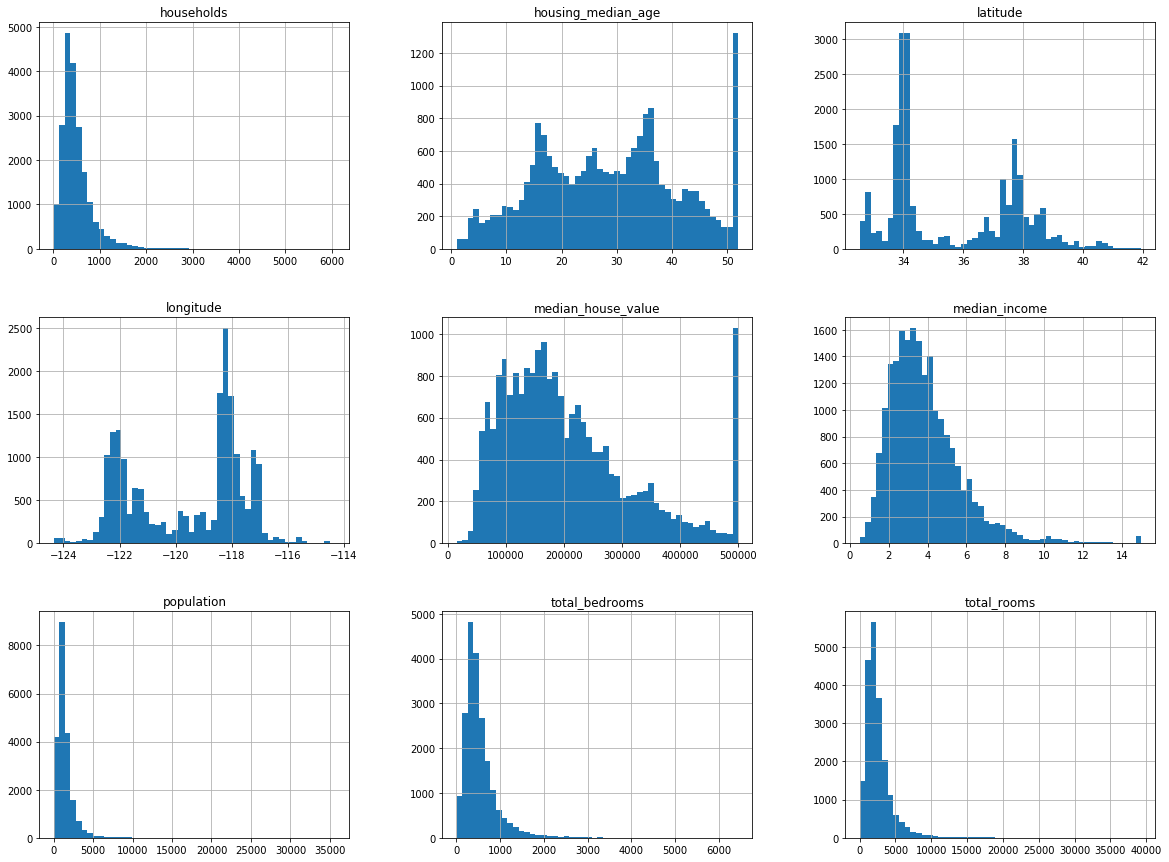

In [10]:
# We can draw a histogram for each of the dataframes features
# using the hist function
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show() # pandas internally uses matplotlib, and to display all the figures
           # the show() function must be called

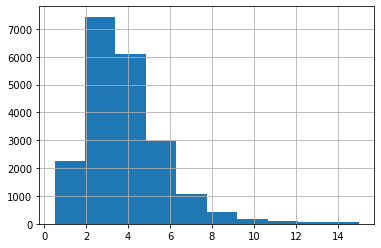

In [11]:
# if you want to have a histogram on an individual feature:
housing["median_income"].hist()
plt.show()

We can convert a floating point feature to a categorical feature
by binning or by defining a set of intervals. 

For example, to bin the 
households based on median_income we can use the pd.cut function

In [12]:
# assign each bin a categorical value [1, 2, 3, 4, 5] in this case.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

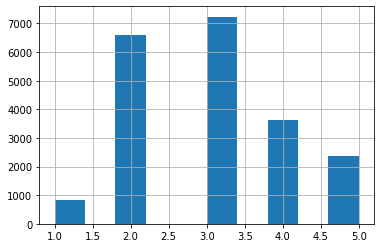

In [13]:
housing["income_cat"].hist()

#### Next let's visualize the household incomes based on latitude & longitude coordinates

Saving figure bad_visualization_plot


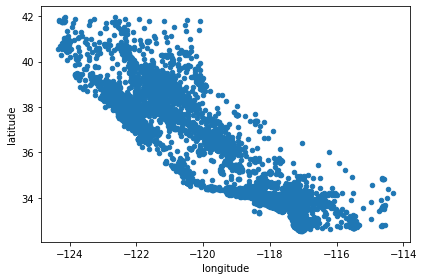

In [14]:
## here's a not so interestting way plotting it
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


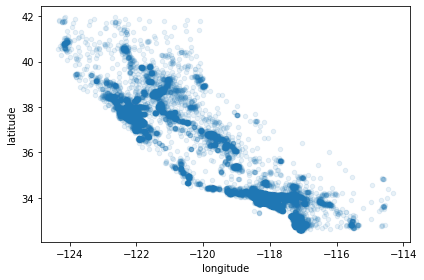

In [15]:
# we can make it look a bit nicer by using the alpha parameter, 
# it simply plots less dense areas lighter.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure california_housing_prices_plot


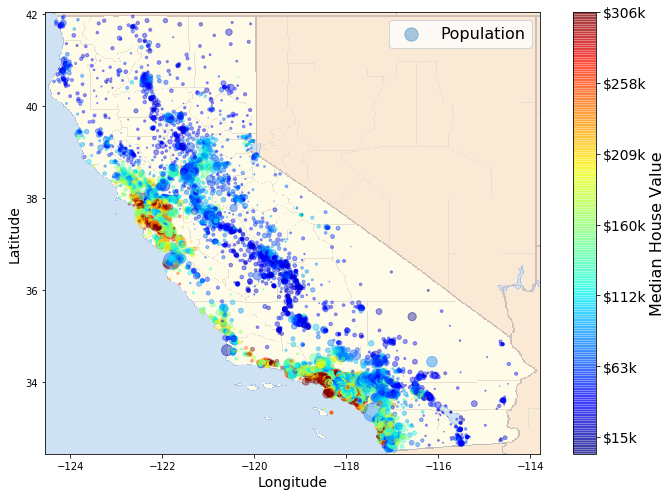

In [16]:
# A more interesting plot is to color code (heatmap) the dots
# based on income. The code below achieves this

# load an image of california
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cb.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

Not suprisingly, the most expensive houses are concentrated around the San Francisco/Los Angeles areas.

Up until now we have only visualized feature histograms and basic statistics. 

When developing machine learning models the predictiveness of a feature for a particular target of intrest is what's important.

It may be that only a few features are useful for the target at hand, or features may need to be augmented by applying certain transfomrations. 

None the less we can explore this using correlation matrices.

In [17]:
corr_matrix = housing.corr()

In [18]:
# for example if the target is "median_house_value", most correlated features can be sorted
# which happens to be "median_income". This also intuitively makes sense.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


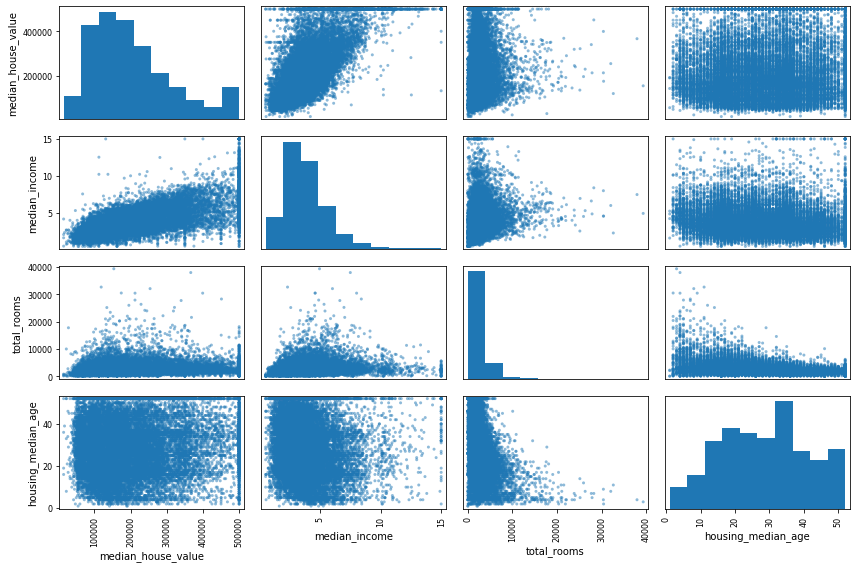

In [19]:
# the correlation matrix for different attributes/features can also be plotted
# some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


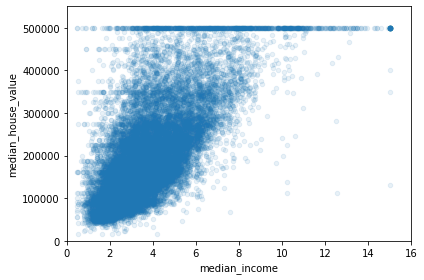

In [20]:
# median income vs median house vlue plot plot 2 in the first row of top figure
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

### Augmenting Features
New features can be created by combining different columns from our data set.

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- etc.

In [21]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
# obtain new correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

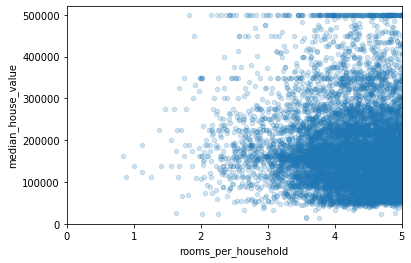

In [23]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [24]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Preparing Dastaset for ML

Once we've visualized the data, and have a certain understanding of how the data looks like. It's time to clean!

Most of your time will be spent on this step, although the datasets used in this project are relatively nice and clean... it could get real dirty.

After having cleaned your dataset you're aiming for:
- train set
- test set

In some cases you might also have a validation set as well for tuning hyperparameters (don't worry if you're not familiar with this term yet..)

In supervised learning setting your train set and test set should contain (**feature**, **target**) tuples. 
 - **feature**: is the input to your model
 - **target**: is the ground truth label
     - when target is categorical the task is a classification task
     - when target is floating point the task is a regression task
     
We will make use of **[scikit-learn](https://scikit-learn.org/stable/)** python package for preprocessing. 

Scikit learn is pretty well documented and if you get confused at any point simply look up the function/object!

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

# let's first start by creating our train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [26]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3,4.505810,0.231341,3.047847


In [27]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
housing_labels = train_set["median_house_value"].copy()

### Dealing With Incomplete Data

In [28]:
# have you noticed when looking at the dataframe summary certain rows 
# contained null values? we can't just leave them as nulls and expect our
# model to handle them for us...
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


In [29]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1: simply drop rows that have null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [30]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2: drop the complete feature

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


In [31]:
median = housing["total_bedrooms"].median() 
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3: replace na values with median values
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


Could you think of another plausible imputation for this dataset? (Not graded)

It would make sense to have a model that makes a prediction on the total number of bedrooms based on another non-missing factor that is highly correlated, like number of bathrooms or square footage of the house.

### Prepare Data

In [32]:
# This cell implements the complete pipeline for preparing the data
# using sklearns TransformerMixins
# Earlier we mentioned different types of features: categorical, and floats.
# In the case of floats we might want to convert them to categories.
# On the other hand categories in which are not already represented as integers must be mapped to integers before
# feeding to the model.

# Additionally, categorical values could either be represented as one-hot vectors or simple as normalized/unnormalized integers.
# Here we encode them using one hot vectors.

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

# define an instance of SimpleImputer which will fill in nulls with median for that column
# imputer = SimpleImputer(strategy="median")
# select the numeric values 
housing_num = housing.drop("ocean_proximity", axis=1)
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# define an object with a transform method we'll use to augment dataset features
class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the previous features we had defined
    housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
    housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
    housing["population_per_household"]=housing["population"]/housing["households"]
    '''
    # constructor
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    # fit method needs to be in there to be compatible with Pipeline, but we don't actually use it
    def fit(self, X, y=None):
        return self  # nothing else to do
    # function to add extra features to a housing dataset
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# # create an instance of AugmentFeatures class, don't bother to add bpr column
# attr_adder = AugmentFeatures(add_bedrooms_per_room=False)

# # run our data through the transform function and get back JUST the new augmented columns
# housing_extra_attribs = attr_adder.transform(housing.values)

# define a standardized pipeline for what we want to do, with our pre-defined feature augmenting class
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

# # run through the numeric pipeline with the numeric housing data and return transformed data
# housing_num_tr = num_pipeline.fit_transform(housing_num)

# remember what our numerical and categorical features were called
numerical_features = list(housing_num)
categorical_features = ["ocean_proximity"]

# define a pipeline that handles numerical and categorical data
# don't need to define our own pipeline for categorical data, just use the OneHotEncoder
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

# run housing data through the full pipeline and return the transformed table
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 20)

### Select a model and train

Once we have prepared the dataset it's time to choose a model.

As our task is to predict the median_house_value (a floating value), regression is well suited for this.

In [33]:
from sklearn.linear_model import LinearRegression

# create a linear regression object
lin_reg = LinearRegression()

# build a model fit to the training data
lin_reg.fit(housing_prepared, housing_labels)

# let's try the full preprocessing pipeline on a few training instances
data = test_set.iloc[:5]
labels = test_set['median_house_value'][:5]
data_prepared = full_pipeline.transform(data)

print("Predictions:", lin_reg.predict(data_prepared))
print("Actual labels:", list(labels))


Predictions: [425717.48517515 267643.98033218 227366.19892733 199614.48287493
 161425.25185885]
Actual labels: [500001.0, 240300.0, 218200.0, 182100.0, 121300.0]


We can evaluate our model using certain metrics, one possible metric for regression is the mean absolute error

$$\text{MAE} = \frac{\sum_i^n |\hat{y_i} - y_i|}{n}$$

where $\hat{y}$ is the predicted value, and y is the ground truth label. 

In [34]:
from sklearn.metrics import mean_absolute_error

preds = lin_reg.predict(data_prepared)
mae = mean_absolute_error(labels, preds)
mae

33686.68576362873

# TODO: Applying the end-end ML steps to a different dataset.

We will apply what we've learnt to another dataset (airbnb dataset). We will predict airbnb price based on other features.

# [25 pts] Visualizing Data 


### [5 pts] Load the data + statistics

- load the dataset
- display the first 10 rows of the data
- drop the following columns: name, host_name, last_review
- display a summary of the statistics of the loaded data
- plot histograms for 3 features of your choice

In [35]:
# load airbnb data
ab = pd.read_csv('datasets/airbnb/AB_NYC_2019.csv')

# look at first 10 rows
ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [36]:
# drop unneeded columns
ab = ab.drop(['name', 'host_name', 'last_review'], axis = 1)

# confirm this worked
ab.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [37]:
# display summary of stats of data
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
id                                48895 non-null int64
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 4.8+ MB


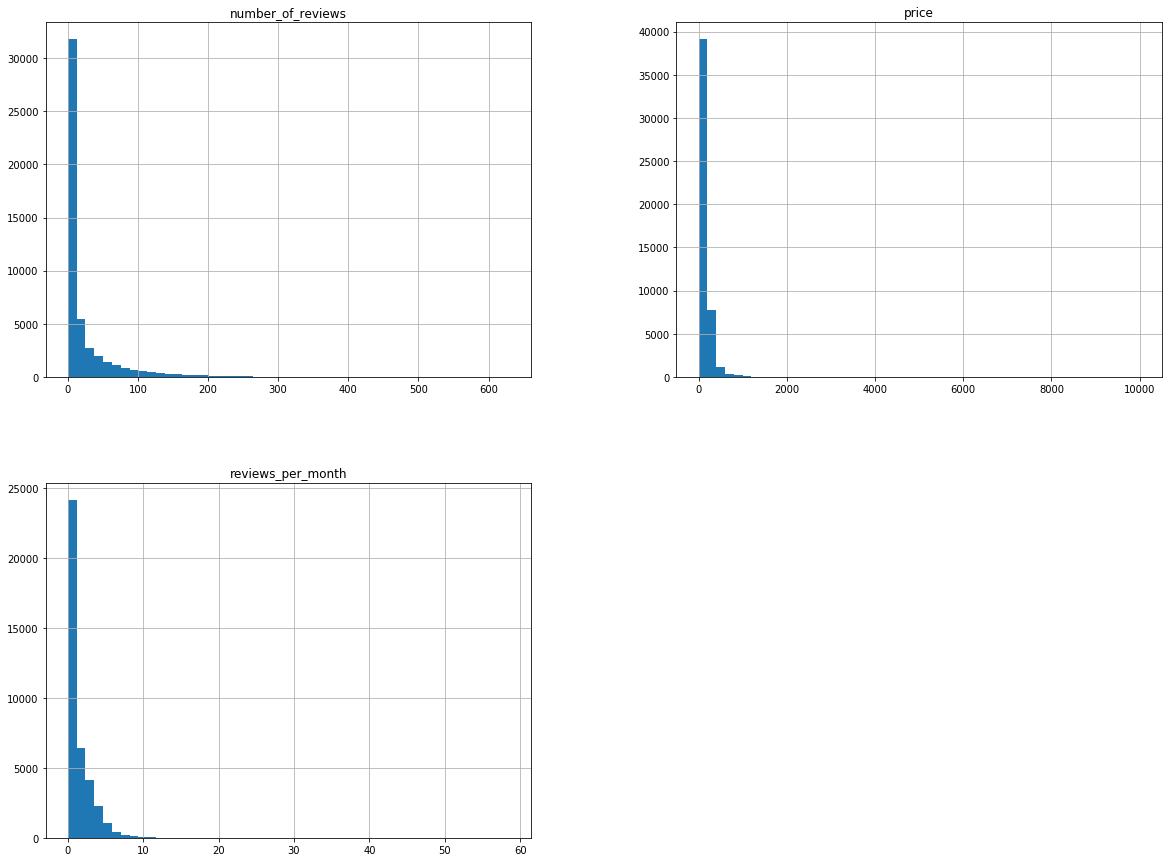

In [38]:
# plot 3 histograms: 
# price
# number of reviews
# reviews/month

ab[['price', 'number_of_reviews', 'reviews_per_month']].hist(bins = 50, figsize = (20, 15))
plt.show()

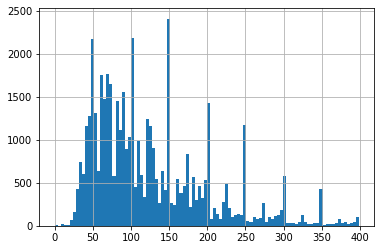

In [39]:
# zoom in on price histogram
ab[ab['price'] < 400]['price'].hist(bins = 100)

### [5 pts] Plot median price per neighbourhood_group

                     price
neighbourhood_group       
Bronx                   65
Brooklyn                90
Manhattan              150
Queens                  75
Staten Island           75


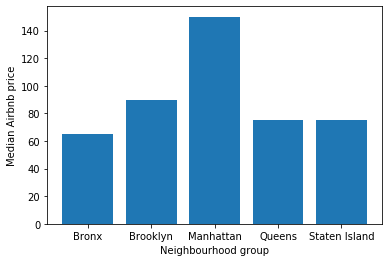

In [40]:
# take just nbhd group labels and price, then group by nbhd group and collapse prices to their median
nbhd_med = ab[['neighbourhood_group', 'price']].groupby('neighbourhood_group').median()
print(nbhd_med)

# plot the result
plt.bar(nbhd_med.index, nbhd_med['price'])
plt.xlabel('Neighbourhood group')
plt.ylabel('Median Airbnb price')
plt.show()

### [5 pts] Plot map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ). 

Saving figure ny_airbnbs_plot


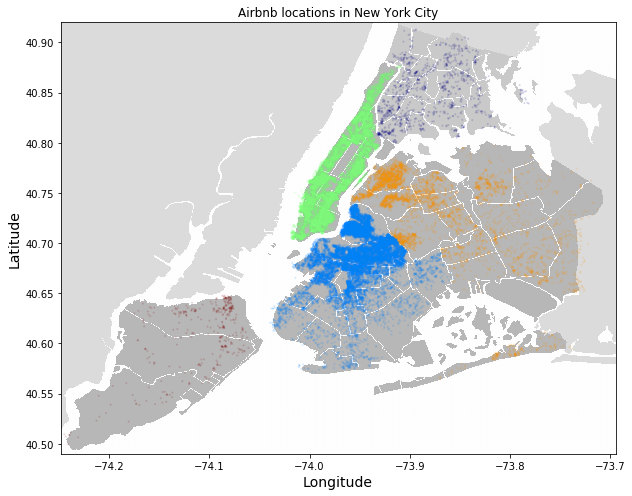

In [41]:
# plot airbnbs in New York
from sklearn.preprocessing import LabelEncoder

# load an image of nyc
filename = "newyork.png"
ny_img = mpimg.imread(os.path.join(images_path, filename))

le = LabelEncoder()
le.fit(ab["neighbourhood_group"])
# generate a scatter plot of airbnb locations
ax = ab.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7), 
                        s = 1.5, c = le.transform(ab["neighbourhood_group"]), 
                        cmap=plt.get_cmap("jet"), colorbar=False,alpha=0.1)
# overlay the NY map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
plt.imshow(ny_img, extent=[-74.248, -73.695, 40.49,40.92], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Airbnb locations in New York City")

save_fig("ny_airbnbs_plot")
plt.show()

### [5 pts] Plot average price of hosts (host_id) who have more than 50 listings. 

Text(0.5, 1.0, 'Mean nightly Airbnb price for hosts with >50 listings')

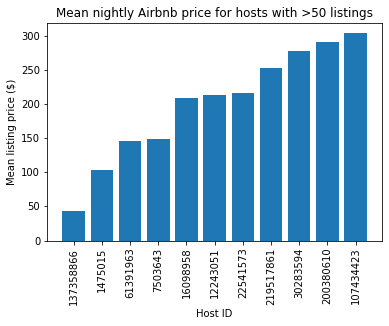

In [42]:
# create the dataframe we need: hosts with more than 50 listings, grouped by host, collapsed by mean
ab50 = ab[ab["calculated_host_listings_count"] > 50][["host_id", "price"]].groupby("host_id").mean()
ab50 = ab50.sort_values(by = 'price')

# plot these means
plt.bar(ab50.index.astype(str), ab50["price"])
plt.xticks(rotation = 90)
plt.xlabel("Host ID")
plt.ylabel("Mean listing price ($)")
plt.title("Mean nightly Airbnb price for hosts with >50 listings")


### [5 pts] Plot correlation matrix
- which features have positive correlation?
- which features have negative correlation?

In [43]:
# run pairwise correlations between all features in ab
cortable = ab.corr()
cortable

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [44]:
# check correlations with price
cortable["price"].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

Saving figure scatter_matrix_plot_airbnb


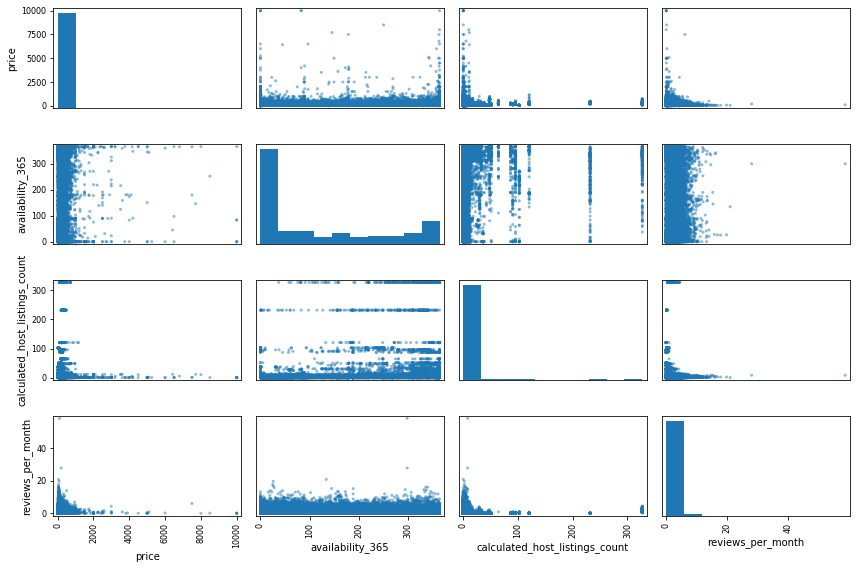

In [45]:
# the correlation matrix for different attributes/features can also be plotted
# some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
attrib = ["price", "availability_365", "calculated_host_listings_count",
              "reviews_per_month"]
scatter_matrix(ab[attrib], figsize=(12, 8))
save_fig("scatter_matrix_plot_airbnb")

Of the relevant numeric factors, availability and number of host listings are the most positively correlated with price, while absolute and monthly number of reviews are the most negatively correlated with price. 

# [25 pts] Prepare the Data

### [5 pts] Set aside 25% of the data as test set (75% train, 25% test).

In [46]:
# subdivide the data

# first, generate an income category column to inform the split
ab['price_cat'] = pd.cut(ab['price'], bins = [-1, 100, 500, 1000, 2000, np.inf], labels = [1, 2, 3, 4, 5])

# then, run the split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(ab, ab["price_cat"]):
    train_set = ab.loc[train_index]
    test_set = ab.loc[test_index]

# verify the split worked
print(train_set.shape)
print(test_set.shape)
train_set.head()

(36671, 14)
(12224, 14)


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_cat
27923,21851228,7709305,Manhattan,Midtown,40.75393,-73.97316,Entire home/apt,200,2,29,1.58,1,18,2
30191,23300336,173485654,Staten Island,Mariners Harbor,40.63179,-74.16122,Private room,40,5,1,0.07,1,87,1
6525,4735505,3570170,Manhattan,Greenwich Village,40.72874,-74.00088,Private room,95,2,4,0.08,1,0,1
11671,9079871,47351539,Brooklyn,East Flatbush,40.65422,-73.93784,Entire home/apt,165,1,232,5.18,4,231,2
31005,24039582,14795719,Brooklyn,Bedford-Stuyvesant,40.68491,-73.93399,Private room,45,6,30,2.06,1,21,1


In [47]:
# remove variable we're predicting from the training set
bnb = train_set.drop('price', axis = 1)
# remember the corresponding prices for each row to test the model later
bnb_labels = train_set['price'].copy()

# remove id and host_id, not going to help us
bnb = bnb.drop(['id', 'host_id'], axis = 1)

### [5 pts] Augment the dataframe with two other features which you think would be useful

In [48]:
# add reviews per listing, potentially more useful than raw review count
bnb['reviews_per_listing'] = bnb['number_of_reviews'] / bnb['calculated_host_listings_count']

# add months the airbnb has been listed for, could identify fresh new listings/old dependable listings
bnb['months_listed'] = bnb['number_of_reviews'] / bnb['reviews_per_month']

### [5 pts] Impute any missing feature with a method of your choice, and briefly discuss why you chose this imputation method

In [49]:
# find missing data
incomp = bnb[bnb.isnull().any(axis = 1)]
incomp.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_cat,reviews_per_listing,months_listed
42813,Manhattan,Midtown,40.76425,-73.98090,Entire home/apt,1,0,NaN,8,0,2,0.0,NaN
22139,Brooklyn,Prospect-Lefferts Gardens,40.65749,-73.95511,Private room,2,0,NaN,1,0,1,0.0,NaN
10843,Manhattan,Harlem,40.82720,-73.94137,Private room,1,0,NaN,1,0,1,0.0,NaN
22455,Manhattan,Hell's Kitchen,40.76470,-73.99414,Entire home/apt,30,0,NaN,31,353,2,0.0,NaN
39477,Manhattan,Midtown,40.75585,-73.96502,Entire home/apt,30,0,NaN,96,158,2,0.0,NaN


In [50]:
# confirm that all the NaN's are in reviews per month
incomp.dropna(subset = ['reviews_per_month'])

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_cat,reviews_per_listing,months_listed


In [51]:
# confirm all NaN's in reviews per month column come from zeros in number of reviews
incomp['number_of_reviews'].value_counts()

0    7476
Name: number_of_reviews, dtype: int64

In [52]:
# fill NaN values with 0
bnb['reviews_per_month'] = bnb['reviews_per_month'].fillna(0)
bnb['months_listed'] = bnb['months_listed'].fillna(0)

# confirm we eliminated all NaN in bnb
incomp = bnb[bnb.isnull().any(axis = 1)]
print(incomp.shape)
bnb.info()

(0, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36671 entries, 27923 to 2620
Data columns (total 13 columns):
neighbourhood_group               36671 non-null object
neighbourhood                     36671 non-null object
latitude                          36671 non-null float64
longitude                         36671 non-null float64
room_type                         36671 non-null object
minimum_nights                    36671 non-null int64
number_of_reviews                 36671 non-null int64
reviews_per_month                 36671 non-null float64
calculated_host_listings_count    36671 non-null int64
availability_365                  36671 non-null int64
price_cat                         36671 non-null category
reviews_per_listing               36671 non-null float64
months_listed                     36671 non-null float64
dtypes: category(1), float64(5), int64(4), object(3)
memory usage: 3.7+ MB


Why I decided to fill every NaN with 0:

* Every row with a NaN in it had NaN in reviews_per_month and my augmented column months_listed
* Every one of these rows had a 0 in number_of_reviews
* I inferred that these listings were ones which had been posted less than a month from the date of data collection, maybe even on the day of data collection, so the original "months since listed" column (used to calculate reviews_per_month) must have had a 0 in it
* This would have caused a divide-by-zero error in calculating reviews_per_month, resulting in all the NaN's
* It makes sense to set reviews_per_month = 0 and months_listed = 0 in this case, and I didn't want to lose 2,000+ rows of data

### [10 pts] Code complete data pipeline using sklearn mixins

## Define helper functions/classes for pipeline

In [53]:
# define data cleaning function
def cleanAirbnbData(rawdata):
    ''' run the cleaning steps needed before running the sklearn pipeline '''
    df = rawdata
    labels = df['price'].copy() # remember labels
    df = df.drop(['price', 'price_cat'], axis = 1) # remove feature we're predicting and its categorical version
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0) # fill NaN's in reviews/mon column
    df = df.drop(['id', 'host_id', 'name', 'host_name', 'last_review'], axis = 1) # remove irrelevant columns
    cleandata = df
    # divide into num and cat features
    df_num = df.select_dtypes(np.number) 
    num_feat = list(df_num)
    cat_feat = list(set(list(df)) - set(num_feat))
    return (cleandata, labels, num_feat, cat_feat)

In [54]:
# define feature augmenter class to plug into Pipeline
numrev_idx, revmon_idx, numlist_idx = 3, 4, 5
class FeatureAugmenter(BaseEstimator, TransformerMixin):
    '''
    implements the transformations we ran one by one before
    '''
    # constructor doesn't need to do anything
    def __init__(self):
        return None
    # need fit method for compat with Pipeline
    def fit(self, X, y = None):
        return self
    # transform method runs the augmentations
    def transform(self, X):
        reviews_per_listing = X[:, numrev_idx] / X[:, numlist_idx]
        # use np.divide to handle NaN case (here, we want number/0 = 0 instead of NaN)
        months_listed = np.divide(X[:, numrev_idx], X[:, revmon_idx], out = np.zeros_like(X[:, numrev_idx]), where = X[:, revmon_idx] != 0)
        return np.c_[X, reviews_per_listing, months_listed]

## Load, separate, and clean train and test data

In [55]:
# start over... re-import the data
ab = pd.read_csv('datasets/airbnb/AB_NYC_2019.csv')

# subdivide the data
# first, generate an income category column to inform the split
ab['price_cat'] = pd.cut(ab['price'], bins = [-1, 100, 500, 1000, 2000, np.inf], labels = [1, 2, 3, 4, 5])

# then, run the split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(ab, ab["price_cat"]):
    train_set = ab.loc[train_index]
    test_set = ab.loc[test_index]

# verify the split worked
print(train_set.shape)
print(test_set.shape)
train_set.head()

(36671, 17)
(12224, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_cat
27923,21851228,"Clean, Comfy and Central Midtown Haven!",7709305,Sasha,Manhattan,Midtown,40.75393,-73.97316,Entire home/apt,200,2,29,2019-06-15,1.58,1,18,2
30191,23300336,Cozy room,173485654,Patricia,Staten Island,Mariners Harbor,40.63179,-74.16122,Private room,40,5,1,2018-04-12,0.07,1,87,1
6525,4735505,Greenwich Village w Private Garden,3570170,John,Manhattan,Greenwich Village,40.72874,-74.00088,Private room,95,2,4,2017-06-02,0.08,1,0,1
11671,9079871,NYCHaven1: Entire House for less than a hotel ...,47351539,Jason,Brooklyn,East Flatbush,40.65422,-73.93784,Entire home/apt,165,1,232,2019-06-23,5.18,4,231,2
31005,24039582,BedSTUY SupperCLUB,14795719,Shirley,Brooklyn,Bedford-Stuyvesant,40.68491,-73.93399,Private room,45,6,30,2019-06-20,2.06,1,21,1


In [56]:
# prep training data
train_clean, train_labels, num_feat, cat_feat = cleanAirbnbData(train_set)

# prep test data
test_clean, test_labels, num_feat, cat_feat = cleanAirbnbData(test_set)

# check columns line up and no null anywhere
assert(list(train_clean) == list(test_clean))
print(np.where(pd.isnull(train_clean)))
print(np.where(pd.isnull(test_clean)))

train_clean.head()

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
27923,Manhattan,Midtown,40.75393,-73.97316,Entire home/apt,2,29,1.58,1,18
30191,Staten Island,Mariners Harbor,40.63179,-74.16122,Private room,5,1,0.07,1,87
6525,Manhattan,Greenwich Village,40.72874,-74.00088,Private room,2,4,0.08,1,0
11671,Brooklyn,East Flatbush,40.65422,-73.93784,Entire home/apt,1,232,5.18,4,231
31005,Brooklyn,Bedford-Stuyvesant,40.68491,-73.93399,Private room,6,30,2.06,1,21


## Define standardized pipeline

In [57]:
# define numerical data pipeline
num_pipeline = Pipeline([ 
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 0)), 
    ('attribs_adder', FeatureAugmenter()),
    ('std_scaler', StandardScaler())
    ])

In [58]:
# define full data pipeline
full_pipeline = ColumnTransformer([ 
    ('num', num_pipeline, num_feat), 
    ('cat', OneHotEncoder(handle_unknown = 'ignore'), cat_feat)]
    )

## Run train and test data through the pipeline

In [59]:
train_prep = full_pipeline.fit_transform(train_clean)
test_prep = full_pipeline.transform(test_clean)

assert(train_prep.shape[1] == test_prep.shape[1])

# [15 pts] Fit a model of your choice

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using Mean Absolute Error (MAE).
Provide both test and train set MAE values.

## Create the model

In [60]:
# create a linear regression object
linreg = LinearRegression()

# fit it to our training data
linreg.fit(train_prep, train_labels)

# now, we can run this model on any data and it should theoretically give a good prediction of price

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate the model's performance

In [61]:
# first, test if it can predict the training data labels
train_pred = linreg.predict(train_prep)
train_err = mean_absolute_error(train_pred, train_labels)
print("Train set MAE = " + str(train_err))

Train set MAE = 71.79581927043326


/Users/niko/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Training data performance')

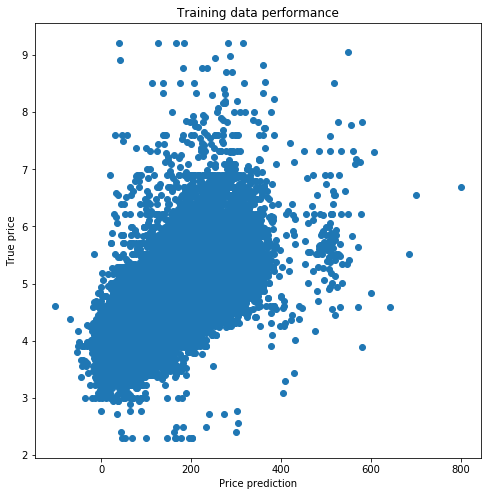

In [62]:
# plot this prediction
plt.figure(figsize = (8, 8))
plt.scatter(train_pred, np.log(bnb_labels))
plt.xlabel("Price prediction")
plt.ylabel("True price")
plt.title("Training data performance")

In [63]:
# use the model fit to the training data to predict the test data
test_pred = linreg.predict(test_prep)

# see how it stacks up against the true value
test_err = mean_absolute_error(test_pred, test_labels)
print("Test set MAE = " + str(test_err))

Test set MAE = 71.05287016738563


So, we can at least say that the model performs just as well on the test data that it's never seen as it performs on the training data that built it (and even does a tiny bit better). 

/Users/niko/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Test data performance')

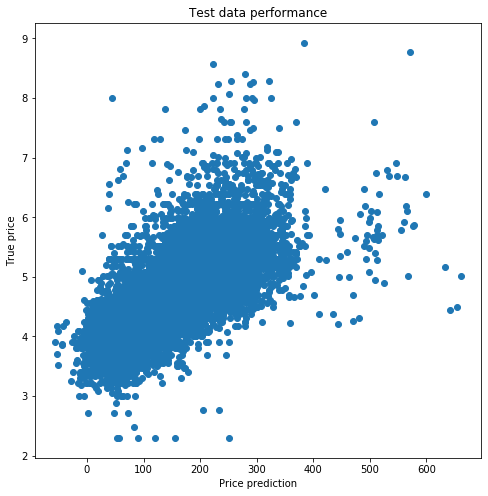

In [64]:
# plot results of model predicting test data
plt.figure(figsize = (8, 8))
plt.scatter(test_pred, np.log(test_labels))
plt.xlabel("Price prediction")
plt.ylabel("True price")
plt.title("Test data performance")

Looks like log-transforming the y is more informative for these two plots. 